In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data = pd.read_excel('Online_Retail_CLEANED.xlsx')

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,1


In [4]:
#initialize label encoder
label_encoder = preprocessing.LabelEncoder()

In [5]:
#save list of countries for encoding
list_of_countries = ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified']

### Data Cleaning

In [6]:
#Change InvoiceDate to InvoiceMonth
data['InvoiceMonth'] = pd.DatetimeIndex(data['InvoiceDate']).month

In [7]:
#Remove negative values from Quantity feature (removes ~2% of the data)
data = data[data.Quantity >= 0]

In [8]:
#Create copy of dataframe for results
final_data = data.copy()

In [9]:
#Define the features to be used in the model
cols_to_keep = ['Quantity', 'UnitPrice','Country','StockCode','InvoiceMonth']
#Remove unneccessary features
reg_data = data[cols_to_keep].copy()

#calculating the Total_Price column
reg_data['Total_Price']=reg_data['Quantity']*reg_data['UnitPrice']

#Label encode the Country field to be able to use the non-numeric field
reg_data['Country'] = label_encoder.fit_transform(reg_data['Country'])
reg_data['StockCode'] = label_encoder.fit_transform(reg_data['StockCode'])

### Defining Dependent and Independent Variables

In [10]:
y = reg_data['Total_Price']

x = reg_data.iloc[:,0:5]

In [11]:
#splitting train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state =100)

In [12]:
#Building the linear model
regressor = LinearRegression()
regressor.fit(x_train ,y_train)

#Intercept and Coefficient
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(x, regressor.coef_))

Intercept:  -11.56752556046624
Coefficients:


[('Quantity', 1.9584211145251662),
 ('UnitPrice', 1.0855531885590937),
 ('Country', 0.11139436479586334),
 ('StockCode', 0.0013364954545697946),
 ('InvoiceMonth', 0.1102588632864022)]

In [13]:
#Prediction of test set
y_pred = regressor.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [-0.46374166 13.94180502  6.15524653 ...  9.34234823 36.56551004
  2.12416051]


### Model Output

In [14]:
#Actual value and the predicted value
regressor_diff = pd.DataFrame({'ActualPrice': y_test, 'PredictedPrice': y_pred})

#Take the absolute value of the difference to determine the actual error
regressor_diff['Difference'] = regressor_diff['PredictedPrice'] - regressor_diff['ActualPrice']
regressor_diff['abs(Difference)'] = regressor_diff['Difference'].abs()

#Print the Mean and Standard Deviation of the entire population of results.
print("MEAN: ", regressor_diff['abs(Difference)'].mean())
print("STD DEV: ", regressor_diff['abs(Difference)'].std())

MEAN:  13.058003268427473
STD DEV:  183.07250422330907


In [15]:
#exporting the output to excel
regressor_diff.to_excel("Online Retail Data with Linear Regression Predictions.xlsx", index=False)

### Model Evaluation

In [16]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(regressor.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 77.23
Mean Absolute Error: 13.058003268427644
Mean Square Error: 33685.84297286947
Root Mean Square Error: 183.537034336042


The R2 shows that 77% of the  dependent variable (TotalPrice) can be explained by the linear model. 

### Plotting the Feature Importance graph

Feature: 0, Score: 1.95842
Feature: 1, Score: 1.08555
Feature: 2, Score: 0.11139
Feature: 3, Score: 0.00134
Feature: 4, Score: 0.11026


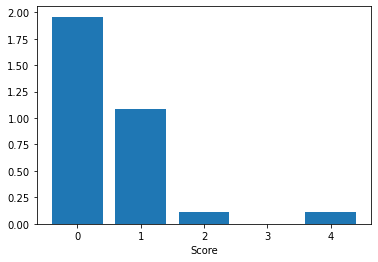

In [17]:
importance = regressor.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(11,5))
plt.title('Feature Importace Graph')
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Feature Index')
plt.xlabel('Score')
plt.show()

Feature 0 (Quality) : Has the highest importace score of ~ 1.96
Feature 1 (UnitPrice)  ~1.09
Feature 2 (Country) ~ 0.11
Feature 3 (StockCode) is the least significant, with 0.01 importance score
Feature 4 (InvoiceMonth) ~0.11